<a href="https://colab.research.google.com/github/cgeraldes/AULAS/blob/main/CGRNN_NASDAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/cgeraldes/AULAS/main/files/NASDAQ.csv

--2024-01-16 22:11:38--  https://raw.githubusercontent.com/cgeraldes/AULAS/main/files/NASDAQ.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85564 (84K) [text/plain]
Saving to: ‘NASDAQ.csv’

NASDAQ.csv          100%[===================>]  83.56K  --.-KB/s    in 0.01s   

2024-01-16 22:11:39 (6.33 MB/s) - ‘NASDAQ.csv’ saved [85564/85564]



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('NASDAQ.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-16,27.573000,27.750000,27.525999,27.591999,26.198719,417000
1,2019-01-17,27.528000,27.858999,27.469000,27.773001,26.370579,383000
2,2019-01-18,27.996000,28.181999,27.822001,28.056999,26.640240,771000
3,2019-01-22,27.903000,27.927000,27.334999,27.570000,26.177832,822000
4,2019-01-23,27.693001,27.767000,27.290001,27.523001,26.133200,343000


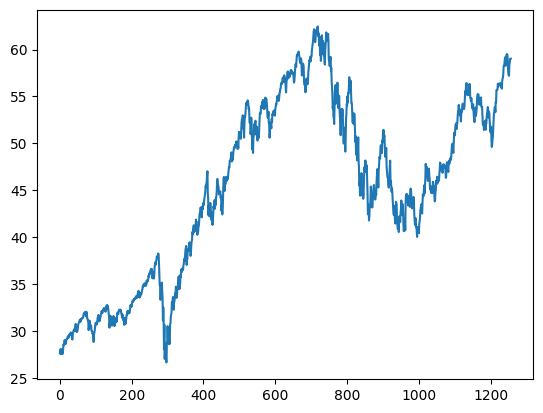

In [4]:
L = len(df)
Y = df.iloc[:,4]
Y= np.array(Y)
Y= Y.reshape(-1,1)
plt.plot(Y)
plt.show(block= False)

In [5]:
X1= Y[0:L-3,:]
X2=Y[1:L-2,:]
X3=Y[2:L-1,:]
Y = Y[3:L,:]
X= np.concatenate([X1,X2,X3],axis=1)
print(f'X shape is {X.shape}')
print(f'Y shape is {Y.shape}')

X shape is (1254, 3)
Y shape is (1254, 1)


In [6]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)
X= np.reshape(X, (X.shape[0],1,X.shape[1]))

In [7]:
X_train = X[:190,:,:]
X_test = X[190:,:,:]
Y_train = Y[:190,:]
Y_test = Y[190:,:]

In [8]:
model = Sequential()
model.add(LSTM(10,activation = 'tanh',input_shape = (1,3),recurrent_activation= 'hard_sigmoid'))

In [9]:
model.add(Dense(1))

In [10]:
model.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train,Y_train,epochs=100,verbose=2)
Predict = model.predict(X_test)

Epoch 1/100
6/6 - 2s - loss: 0.0094 - mean_absolute_error: 0.0916 - 2s/epoch - 411ms/step
Epoch 2/100
6/6 - 0s - loss: 0.0059 - mean_absolute_error: 0.0718 - 18ms/epoch - 3ms/step
Epoch 3/100
6/6 - 0s - loss: 0.0040 - mean_absolute_error: 0.0578 - 21ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 0.0027 - mean_absolute_error: 0.0465 - 21ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0018 - mean_absolute_error: 0.0372 - 20ms/epoch - 3ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0012 - mean_absolute_error: 0.0300 - 21ms/epoch - 3ms/step
Epoch 7/100
6/6 - 0s - loss: 8.6379e-04 - mean_absolute_error: 0.0253 - 31ms/epoch - 5ms/step
Epoch 8/100
6/6 - 0s - loss: 6.9774e-04 - mean_absolute_error: 0.0224 - 25ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 6.2445e-04 - mean_absolute_error: 0.0211 - 20ms/epoch - 3ms/step
Epoch 10/100
6/6 - 0s - loss: 5.9888e-04 - mean_absolute_error: 0.0200 - 20ms/epoch - 3ms/step
Epoch 11/100
6/6 - 0s - loss: 5.9424e-04 - mean_absolute_error: 0.0197 - 22ms/epoch

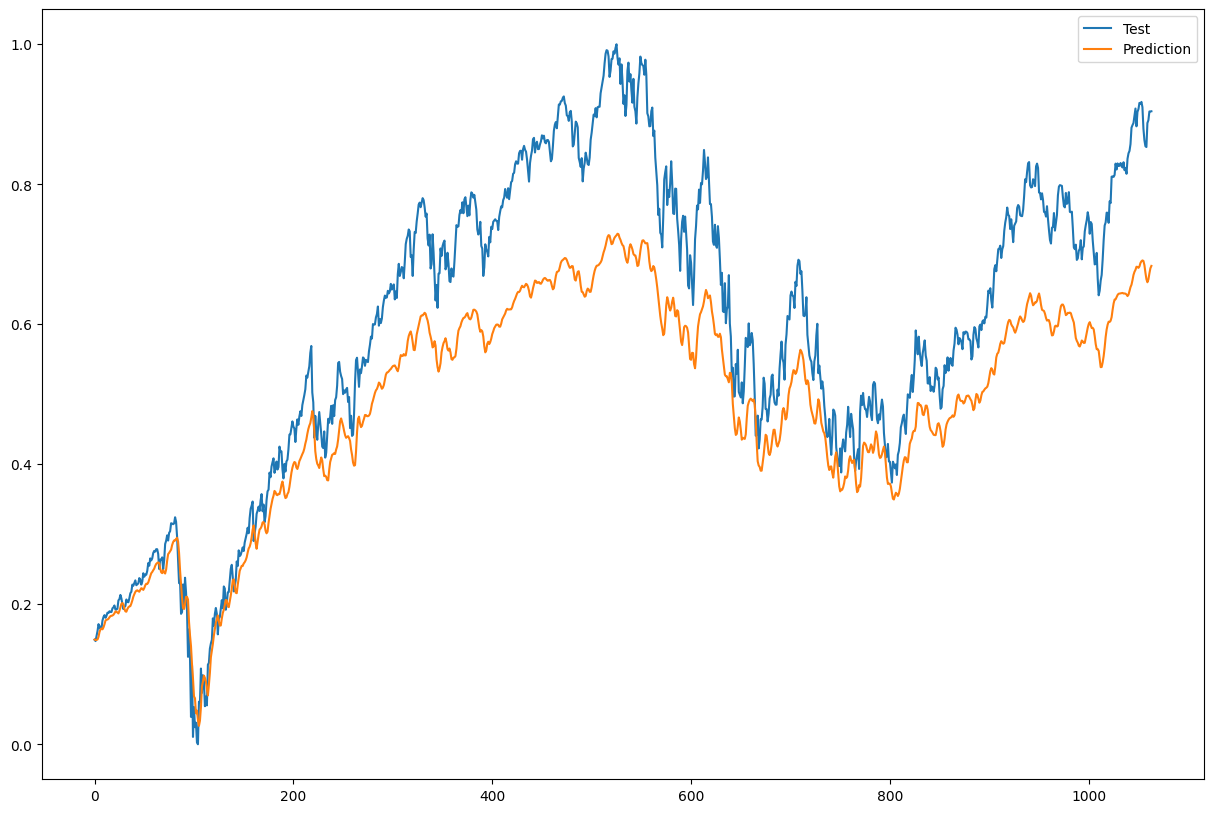

In [11]:
plt.figure(figsize=(15,10))
plt.plot(Y_test,label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()